In [227]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [229]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [230]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="SingBuri",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,1517.167364,42.410974,2247.735336,251.360573,20.751178,540.088489,1553.350483,662.278852,43.742963,80.752569,...,48.223830,37.278020,59467272,0.11918,12384.870133,407634.682481,2134.568256,342336.266980,10,143862.554
1996,2151.732729,39.837997,2525.526291,268.322033,21.818723,412.596415,1778.579003,737.967580,37.939543,90.268175,...,45.255728,37.081286,60130190,0.11918,13039.348373,414866.326298,2150.253635,342215.983314,10,171503.917
1997,2438.909192,28.967616,2434.777758,282.656660,23.104803,399.625836,1934.577471,790.819202,44.211324,89.376423,...,46.814732,36.564600,60846588,0.10214,13222.127602,416885.941624,2154.634165,342182.391127,10,179223.451
1998,2872.227679,23.722862,2635.233786,362.892721,23.570355,241.360017,1787.959114,724.545611,45.740985,87.423898,...,42.303171,36.111727,61585103,0.17525,13255.000370,417249.168605,2155.422002,342176.349586,10,180611.806
1999,1738.973389,18.169377,2775.669860,310.675285,26.850346,240.759815,1607.285461,736.278279,63.183246,98.627151,...,44.267746,36.378900,62298569,0.24836,13473.896446,419667.856278,2160.668116,342136.119643,10,189856.706


In [231]:
df.shape

(24, 31)

In [232]:
list1 = list(df.columns.values)

In [233]:
input_vars = list1[:-1]
len(input_vars)

30

In [234]:
input_vars

['Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Water supply; sewerage, waste management and remediation activities',
 'Construction',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Accommodation and food service activities',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)',
 'จำนวนประชากรทั้งหมด (คน)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็

## Regression before Feature Selection

In [235]:
X1 = df[input_vars]
y1 = df['GPP Per capita (Baht)']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X1_train, y1_train)
y_pred = lm.predict(X1_test)
#[np.sqrt(metrics.mean_squared_error(y1_test,y_pred)),metrics.r2_score(y1_test,y_pred)]

In [236]:
#dataframe
table1 = pd.DataFrame({'R_square': [metrics.r2_score(y1_test,y_pred)], 
                       'RMSE': [np.sqrt(metrics.mean_squared_error(y1_test,y_pred))]}, index=['Linear Regression'])
table1

,R_square,RMSE
Linear Regression,-9.914021,377998.29105


## Filter Methods

#### Low Variance Filtering

In [237]:
df.var()

Agriculture, forestry and fishing                                      1.535881e+06
Mining and quarrying                                                   3.555837e+02
Manufacturing                                                          6.029089e+06
Electricity, gas, steam and air conditioning supply                    4.022516e+04
Water supply; sewerage, waste management and remediation activities    1.931395e+03
Construction                                                           7.642054e+04
Wholesale and retail trade and repair of motor vehicles                4.193227e+05
Transportation and storage                                             4.092644e+03
Accommodation and food service activities                              7.597739e+02
Information and communication                                          1.998355e+03
Financial and insurance activities                                     1.373199e+05
Real estate activities                                                 2.900

In [238]:
# After scanning variances from all features above, set minimum variance threshold = 15 
# Note that minimum variance threshold can be set to any value

# Below is to remove features with low variances
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features with variance >= minimum variance threshold

min_var_threshold = 10000000
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['จำนวนประชากรทั้งหมด (คน)',
 'รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'เนื้อที่สำหรับปลูกนาข้าว (ไร่)']

In [239]:
len(updated_vars)

4

In [240]:
# Above, there are 3 features with variance >= minimum variance threshold
# Create new data frame with these 3 features and 1 output

df2 = df[updated_vars]
#df2['จำนวนประชากรทั้งหมด (คน)']=df1['จำนวนประชากรทั้งหมด (คน)']
df2.head()

,จำนวนประชากรทั้งหมด (คน),รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่)
Year,,,,
1995,59467272,12384.870133,407634.682481,342336.266980
1996,60130190,13039.348373,414866.326298,342215.983314
1997,60846588,13222.127602,416885.941624,342182.391127
1998,61585103,13255.000370,417249.168605,342176.349586
1999,62298569,13473.896446,419667.856278,342136.119643


In [241]:
X = df2[updated_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[34694.55956124063, 0.9080550541980661]

#### High Correlation Filtering

<AxesSubplot:>

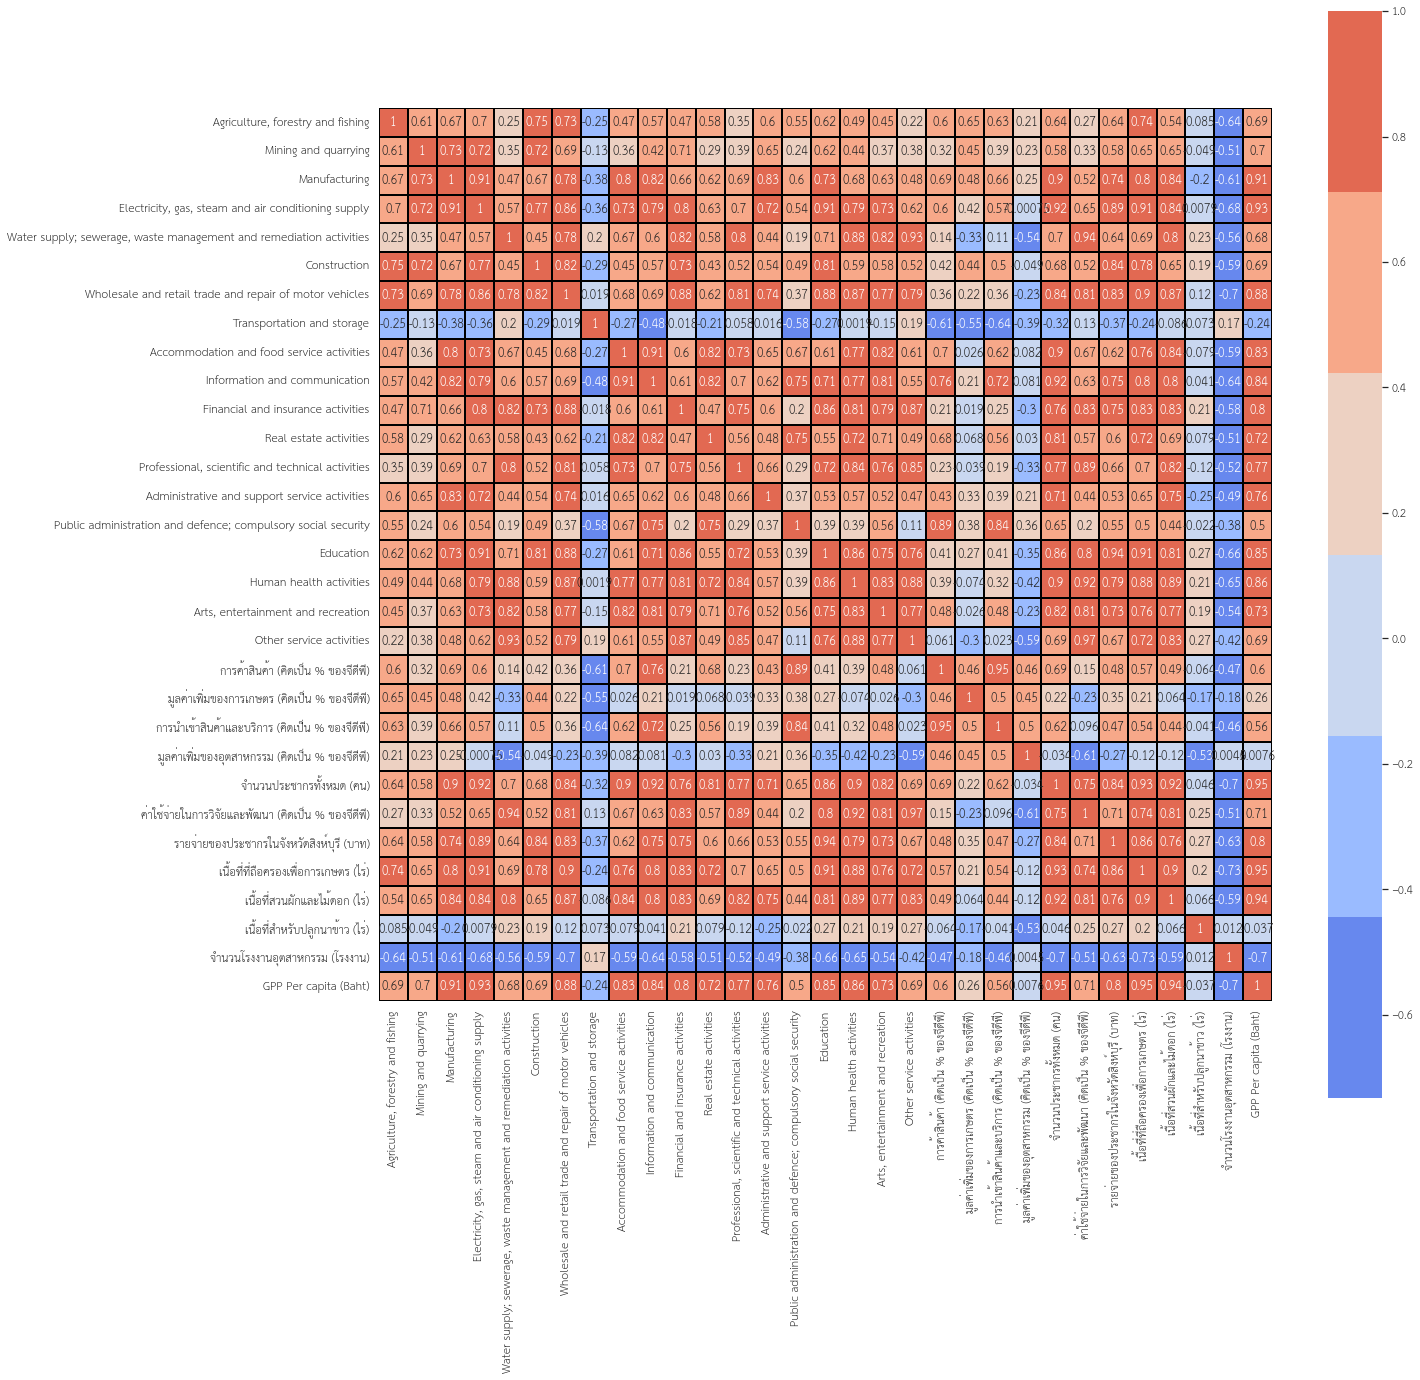

In [242]:
# Plot correlation of numerical data

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)

In [243]:
#remove high correlation Ref. https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]


/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_7642/2449252667.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [244]:
to_drop

['Electricity, gas, steam and air conditioning supply',
 'Construction',
 'Wholesale and retail trade and repair of motor vehicles',
 'Accommodation and food service activities',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'จำนวนประชากรทั้งหมด (คน)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี)',
 'รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'เนื้อที่สวนผักและไม้ดอก (ไร่)',
 'GPP Per capita (Baht)']

In [245]:
len(to_drop)

22

In [246]:
not_high_corr = df.drop(to_drop,axis=1)
not_high_corr

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Water supply; sewerage, waste management and remediation activities",Transportation and storage,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,
1995,1517.167364,42.410974,2247.735336,20.751178,662.278852,9.081225,37.278020,342336.266980,10
1996,2151.732729,39.837997,2525.526291,21.818723,737.967580,9.063416,37.081286,342215.983314,10
1997,2438.909192,28.967616,2434.777758,23.104803,790.819202,9.064902,36.564600,342182.391127,10
1998,2872.227679,23.722862,2635.233786,23.570355,724.545611,10.259227,36.111727,342176.349586,10
1999,1738.973389,18.169377,2775.669860,26.850346,736.278279,8.892995,36.378900,342136.119643,10
2000,2041.548117,15.352669,3129.051723,42.477141,712.624133,8.499848,36.669408,342008.682942,9
2001,1900.398244,16.256769,3458.696101,38.342888,657.053972,8.579287,36.321003,342009.036530,9
2002,1951.473566,14.873887,3567.407259,26.335972,660.097156,8.692178,36.894431,341956.548179,9
2003,2330.576640,14.910602,4839.215608,30.488796,569.156111,9.441355,37.918175,341845.057991,9


In [247]:
X3 = not_high_corr
y3 = df["GPP Per capita (Baht)"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X3_train, y3_train)
y3_pred = lm.predict(X3_test)
[np.sqrt(metrics.mean_squared_error(y3_test,y3_pred)),metrics.r2_score(y3_test,y3_pred)]

[157919.0378780879, -0.9049083378174072]

## Wrapper Methods

#### Forward Feature Selection

In [248]:
from sklearn.feature_selection import f_regression
fstat, pval = f_regression(df[input_vars], df["GPP Per capita (Baht)"])
fstat

array([2.02877756e+01, 2.14925285e+01, 1.02881703e+02, 1.46406979e+02,
       1.89111464e+01, 2.00360045e+01, 7.63024141e+01, 1.37903143e+00,
       4.75957827e+01, 5.12488832e+01, 4.03789747e+01, 2.40376502e+01,
       3.14872626e+01, 3.06323698e+01, 7.29133595e+00, 5.96442084e+01,
       6.27547613e+01, 2.54870064e+01, 2.02967825e+01, 1.23520324e+01,
       1.59097573e+00, 1.01733388e+01, 1.26794429e-03, 2.25883162e+02,
       2.21948616e+01, 3.95934546e+01, 2.08484022e+02, 1.78207025e+02,
       3.01852329e-02, 2.14737038e+01])

In [249]:
pval

array([1.76058567e-04, 1.27631767e-04, 9.31631368e-10, 3.39001372e-11,
       2.57420391e-04, 1.88535483e-04, 1.33097474e-08, 2.52821668e-01,
       6.28803074e-07, 3.54582983e-07, 2.14818553e-06, 6.66797637e-05,
       1.21577485e-05, 1.45878328e-05, 1.30713434e-02, 1.05435905e-07,
       6.94629099e-08, 4.68538862e-05, 1.75629284e-04, 1.95466017e-03,
       2.20398133e-01, 4.23485789e-03, 9.71915885e-01, 4.72239760e-13,
       1.06273113e-04, 2.47712843e-06, 1.05508851e-12, 5.00312268e-12,
       8.63659338e-01, 1.28265388e-04])

In [250]:
# Set threshold to select subset of features based on f-test statistic

# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features selected from f-test statistic from forward feature selection

f_value_threshold = 50  # can adjust this value 
updated_vars = []
for i in range(0,len(input_vars)-1):
    if fstat[i] >= f_value_threshold:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Wholesale and retail trade and repair of motor vehicles',
 'Information and communication',
 'Education',
 'Human health activities',
 'จำนวนประชากรทั้งหมด (คน)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'เนื้อที่สวนผักและไม้ดอก (ไร่)']

In [251]:
X = df[updated_vars]
y = df["GPP Per capita (Baht)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[32666.165366564237, 0.9184917785950892]

#### Recursive Feature Elimination

In [270]:
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['GPP Per capita (Baht)']
n_features = 3  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features_to_select=n_features)
model = rfe.fit(X, y)

In [271]:
# rfe masks features that are selected as 1
model.ranking_

array([20,  8, 25, 18, 12, 21, 16, 14, 13, 15, 11, 23,  2,  5, 24, 17, 19,
        9, 10,  6,  1,  7,  1, 28,  1, 22, 27,  4, 26,  3])

In [272]:
# to obtain coefficients of features in regression model
model.estimator_.coef_

array([ 30571.31013497,  45109.28944967, 487014.93917606])

In [273]:
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features selected from recursive feature elimination

updated_vars = []
for i in range(0,len(input_vars)):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี)']

In [274]:
## Perform regresssion with features selected from recursive feature elimination

X = df[updated_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

# R2 using features selected from rfe is quite low
# With this data, about 27 features need to be selected to get R2 > 0.5

[33319.16198189731, 0.9152005093643545]

## Embedded Methods

#### Random Forest

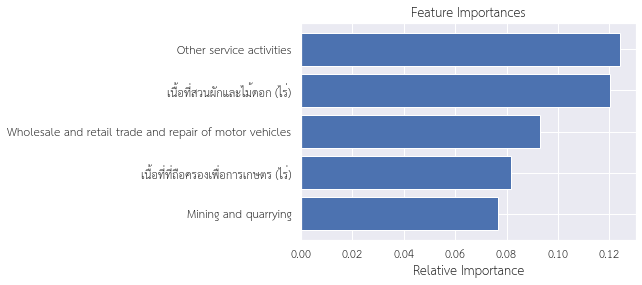

[36478.748738616116, 0.8541962982635616]

In [281]:
#### Random Forest
# RandomForestRegressor receives parameters for random forest such as depth of tree, number of trees

# n_features = number of selected features

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df['GPP Per capita (Baht)'])

n_features = 5

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Choose features with large feature importance
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of 15 features selected from feature importance of random forest
important_features = [features[i] for i in indices]
important_features
updated_vars = []
for i in range(-1,-n_features-1,-1):
    updated_vars.append(important_features[i])
updated_vars
## Perform regresssion with features selected from feature importance of random forest

X = df[updated_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

In [282]:
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of 15 features selected from feature importance of random forest
important_features = [features[i] for i in indices]
important_features
updated_vars = []
for i in range(-1,-n_features-1,-1):
    updated_vars.append(important_features[i])
updated_vars

['Other service activities',
 'เนื้อที่สวนผักและไม้ดอก (ไร่)',
 'Wholesale and retail trade and repair of motor vehicles',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'Mining and quarrying']

In [283]:
## Perform regresssion with features selected from feature importance of random forest

X = df[updated_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[36478.748738616116, 0.8541962982635616]